# Phase diff of incoming tilted beam on local gaussian for inf. half-plane PD (symmetric gap)


If the gap (of total width = $d$) is centered:

\begin{equation}
\Phi_{diff} =
\arctan 
\Big[
    \frac
    {
        erf
        (
            \frac{d}{\sqrt{2} w(z)}
            +
            \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
        )
        -
        erf
        (
            \frac{d}{\sqrt{2} w(z)}
            -
            \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
        )
    }
    { 
        i
        \Big(
            2 - erf
                (
                    \frac{d}{\sqrt{2} w(z)}
                    +
                    \frac{i kw(z) \sin \alpha}{2 \sqrt{2}}
                 )
             -
             erf
                 (
                     \frac{d}{\sqrt{2} w(z)}
                     -
                     \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
                 )
        \Big)
    } 
\Big]
\end{equation}

If, however, the gap is asymmetric (where $s_l =$ distance at left and $s_r =$ distance at right:

\begin{equation}
\Phi_{diff} =
\frac{1}{2}
\Big(
\arctan 
\Big[
    \frac
    {
        erf
        (
            \frac{\sqrt{2} s_r}{w(z)}
            +
            \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
        )
        -
        erf
        (
            \frac{\sqrt{2} s_r}{w(z)}
            -
            \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
        )
    }
    { 
        i
        \Big(
            2 - erf
                (
                    \frac{\sqrt{2} s_r}{w(z)}
                    +
                    \frac{i kw(z) \sin \alpha}{2 \sqrt{2}}
                 )
             -
             erf
                 (
                     \frac{\sqrt{2} s_r}{w(z)}
                     -
                     \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
                 )
        \Big)
    } 
\Big]
+ \\
\arctan
\Big[
    \frac
    {
        erf
        (
            \frac{\sqrt{2} s_l}{w(z)}
            +
            \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
        )
        -
        erf
        (
            \frac{\sqrt{2} s_l}{w(z)}
            -
            \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
        )
    }
    { 
        i
        \Big(
            2 - erf
                (
                    \frac{\sqrt{2} s_l}{w(z)}
                    +
                    \frac{i kw(z) \sin \alpha}{2 \sqrt{2}}
                 )
             -
             erf
                 (
                     \frac{\sqrt{2} s_l}{w(z)}
                     -
                     \frac{ikw(z) \sin \alpha}{2 \sqrt{2}}
                 )
        \Big)
    } 
\Big]
\Big)
\end{equation}

In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfc,erf
from math import exp
pi=np.pi

### input

In [2]:
#spot(w), wavelength(lam),wavenumber(k)
w= 1e-3
lam= 1064e-9
k = 2*pi/lam



#alpha(10nrad)
alpha_min=-700e-6
alpha_max=700e-6
num_points = 1000
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = cycle

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

In [3]:
#function    
def phase_diff(d): 
    return(np.arctan \
            (
                (
                    erf(d/(np.sqrt(2)*w) + (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                    -
                    erf(d/(np.sqrt(2)*w) - (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                )
                /
                (
                    (1j)*
                    (
                        2
                        -
                        erf(d/(np.sqrt(2)*w) + (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                        -
                        erf(d/(np.sqrt(2)*w) - (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                    )
                )
            )
          )


### phase diff vs. angle (SYMMETRIC)

C:\Users\edwar\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


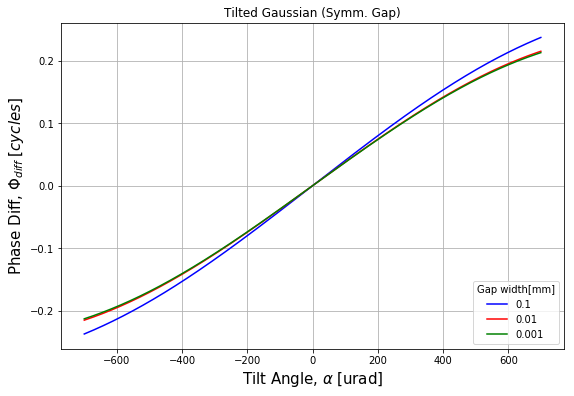

In [4]:
#gap widths
d = 1e-4
d1 = 1e-5
d2 = 1e-6

p = phase_diff(d)
p1 = phase_diff(d1)
p2 = phase_diff(d2)



#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, p*phase_scale, "-b", label=(str(d*1e3)) ) 
plt.plot(alpha*alpha_scale, p1*phase_scale, "-r", label=(str(d1*1e3)) )
plt.plot(alpha*alpha_scale, p2*phase_scale, "-g", label=(str(d2*1e3)) )
plt.legend(title="Gap width[mm]",loc="lower right")

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Phi_{diff} \;[' + ylab + ']$', fontsize=15) 
plt.title(r'Tilted Gaussian (Symm. Gap)') 
plt.grid() 

plt.savefig("aw-tilt-gap.png")

### Computed Deriv. (just checking the previous)
$\frac{d \Delta \phi}{d \alpha}$

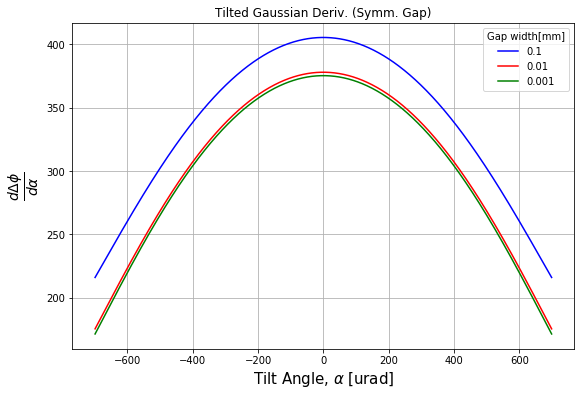

In [5]:
#function
deriv = np.diff(p) / np.diff(alpha)
deriv_1 = np.diff(p1) / np.diff(alpha)
deriv_2 = np.diff(p2) / np.diff(alpha)

alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, deriv*phase_scale, "-b", label=(str(d*1e3)) )
plt.plot(alpha2*alpha_scale, deriv_1*phase_scale, "-r", label=(str(d1*1e3)) )
plt.plot(alpha2*alpha_scale, deriv_2*phase_scale, "-g", label=(str(d2*1e3)) )
plt.legend(title="Gap width[mm]",loc="upper right")

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Tilted Gaussian Deriv. (Symm. Gap)') 
plt.grid()

plt.savefig("aw-tilt-gap-der.png")

### phase diff vs. angle (ASYMMETRIC)

In [6]:
#function    
def phase_diff_asym(l,r): 
    return( .5* np.arctan \
            (
                (
                    erf((np.sqrt(2)*r/w) + (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                    -
                    erf((np.sqrt(2)*r/w) - (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                )
                /
                (
                    (1j)*
                    (
                        2
                        -
                        erf((np.sqrt(2)*r/w) + (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                        -
                        erf((np.sqrt(2)*r/w) - (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                    )
                )
            )
+.5* np.arctan \
            (
                (
                    erf((np.sqrt(2)*l/w) + (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                    -
                    erf((np.sqrt(2)*l/w) - (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                )
                /
                (
                    (1j)*
                    (
                        2
                        -
                        erf((np.sqrt(2)*l/w) + (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                        -
                        erf((np.sqrt(2)*l/w) - (1j)*k*w*np.sin(alpha)/(2*np.sqrt(2)))
                    )
                )
            )
          )

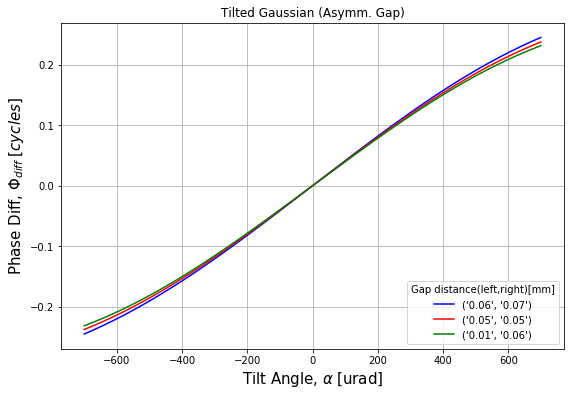

In [7]:
l1=6e-5
r1=7e-5
l2=5e-5
r2=5e-5
l3=1e-5
r3=6.5e-5

p_asym = phase_diff_asym(l1,r1)
p_asym1 =phase_diff_asym(l2,r2)
p_asym2 = phase_diff_asym(l3,r3)

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, p_asym*phase_scale, "-b", label=("{:.2f}".format(l1*1e3),"{:.2f}".format(r1*1e3)) ) 
plt.plot(alpha*alpha_scale, p_asym1*phase_scale, "-r", label=(str(l2*1e3),str(r2*1e3)) )
plt.plot(alpha*alpha_scale, p_asym2*phase_scale, "-g", label=(str(l3*1e3),"{:.2f}".format(r3*1e3)) )
plt.legend(title="Gap distance(left,right)[mm]",loc="lower right")

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Phi_{diff} \;[' + ylab + ']$', fontsize=15) 
plt.title(r'Tilted Gaussian (Asymm. Gap)') 
plt.grid() 

plt.savefig("aw-tilt-initial-gap-asym.png")


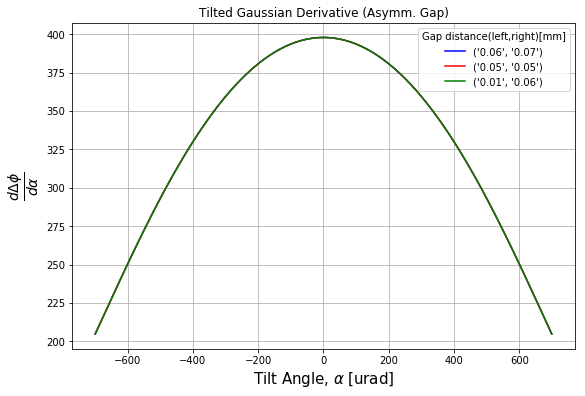

In [8]:
#function
comp_phase_diff_deriv = np.diff(p_asym) / np.diff(alpha)
comp_phase_diff_deriv = np.diff(p_asym1) / np.diff(alpha)
comp_phase_diff_deriv = np.diff(p_asym2) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))
plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, "-b", label=("{:.2f}".format(l1*1e3),"{:.2f}".format(r1*1e3))) 
plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, "-r", label=(str(l2*1e3),str(r2*1e3))) 
plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, "-g", label=(str(l3*1e3),"{:.2f}".format(r3*1e3))) 
plt.legend(title="Gap distance(left,right)[mm]",loc="upper right")

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Tilted Gaussian Derivative (Asymm. Gap)') 
plt.grid()

plt.savefig("aw-tilt-initial-gap-asym-der.png")